In [1]:
import matplotlib
import matplotlib.cbook as cbook
import matplotlib.image as image


matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import numpy as np

### Climate data
The climate data we want in order to reproduce results from Chen et al. (2011) is the Sea Surface Temperature (SST) anomalies. We can use the Monthly Oceanic Nino Index (ONI) or the Atlantic Multidecadal Oscillation (AMO).

For this experiment we'll use the AMO that can be read directly from the following URL:

In [2]:
from urllib import request
import pandas as pd
import io

# Web access for latest version otherwise a local version is in ./
url = "http://www.esrl.noaa.gov/psd/data/correlation/amon.us.data"

with request.urlopen(url) as response:
    amo = response.readlines()

# Decode byte strings
amo = [i.decode() for i in amo]

# First line is a header, last four lines are metadata
fill_value = float(amo[-4])
amo = amo[1:-4]

# First column is year column 1 is Jan, 2 is Feb etc.
amo = pd.read_csv(io.StringIO('\n'.join(amo)), header = None, delim_whitespace = True)
amo.rename(columns = {0:'year'}, inplace = True)
amo.style

,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1948,-0.015,-0.027,0.028,-0.07,-0.004,0.055,-0.039,-0.022,-0.052,0.008,0.135,0.063
1,1949,0.153,0.16,0.039,0.099,-0.024,0.001,0.072,0.103,0.07,0.104,0.108,0.118
2,1950,0.111,-0.033,-0.105,-0.13,-0.058,-0.042,-0.055,0.021,0.01,-0.09,0.08,0.089
3,1951,0.103,-0.001,0.013,0.169,0.173,0.29,0.422,0.304,0.25,0.259,0.175,0.175
4,1952,0.172,0.183,0.231,0.191,0.181,0.383,0.373,0.404,0.362,0.355,0.251,0.341
5,1953,0.265,0.185,0.142,0.313,0.343,0.276,0.344,0.259,0.28,0.148,0.244,0.258
6,1954,0.227,0.096,0.101,-0.013,0.07,0.099,-0.045,-0.014,-0.011,-0.032,-0.027,-0.051
7,1955,0.076,0.04,0.041,0.095,0.176,0.194,0.268,0.175,0.203,0.279,0.386,0.256
8,1956,0.186,0.094,0.014,0.063,-0.058,-0.264,-0.09,-0.098,-0.089,-0.043,-0.087,0.019
9,1957,-0.081,-0.106,-0.02,-0.074,-0.121,-0.013,0.04,0.202,0.22,0.149,0.084,0.079


In [12]:
for index, row in amo.iterrows():
    year = int(row['year'])
    
    if index == 0:
        amo_y = amo[amo.year==year][[1,2,3,4,5,6,7,8,9,10,11,12]].T
        amo_y = amo_y.set_index(pd.date_range(start=f'1/1/{year}', periods=12, freq='M'))
    else:
        tmp_amo_y = amo[amo.year==year][[1,2,3,4,5,6,7,8,9,10,11,12]].T
        tmp_amo_y = tmp_amo_y.set_index(pd.date_range(start=f'1/1/{year}', periods=12, freq='M'))
        
        tmp_amo_y = tmp_amo_y.rename(columns={index:0})

        amo_y = pd.concat([amo_y, tmp_amo_y])
        

<IPython.core.display.Javascript object>


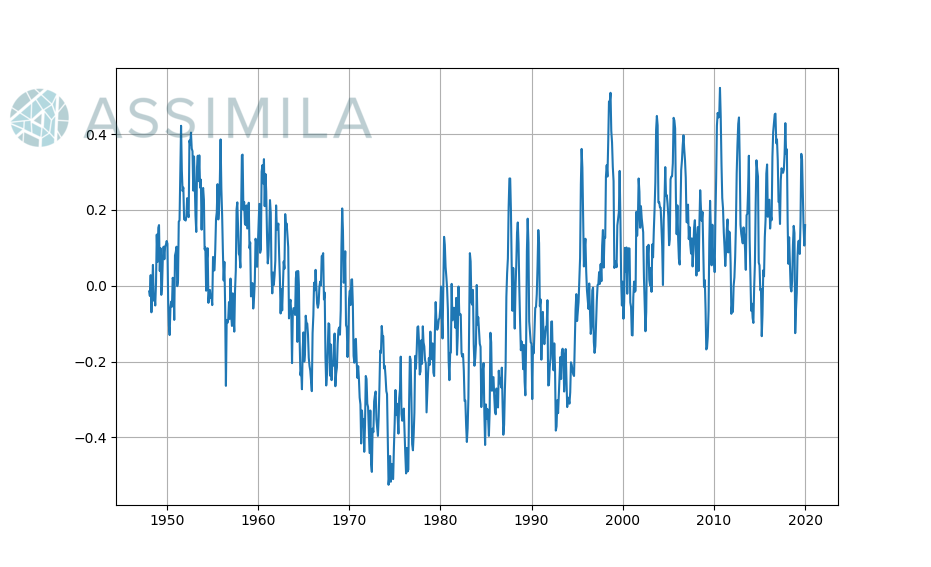

In [33]:

fname = '/home/glopez/Projects/ClimateRiskDisclosure/assimila_small.png'
with cbook.get_sample_data(fname) as file:
    im = image.imread(file)

fig, ax = plt.subplots()

ax.plot(amo_y.index.values, amo_y.values, label='Atlantic Multidecadal Oscillation (AMO)')

ax.grid()
fig.figimage(im, 0, 410, zorder=3, alpha=.3, resize=False)

plt.show()

### ERA5 2m temperature data

In [3]:
# Load data
fname = '/home/glopez/Projects/ClimateRiskDisclosure/ERA5_t2m.xlsx'
era5_t2m = pd.read_excel(fname, header=None, names=['Time', 'mean_2m_air_temperature'])
era5_t2m = era5_t2m.set_index('Time')

<IPython.core.display.Javascript object>


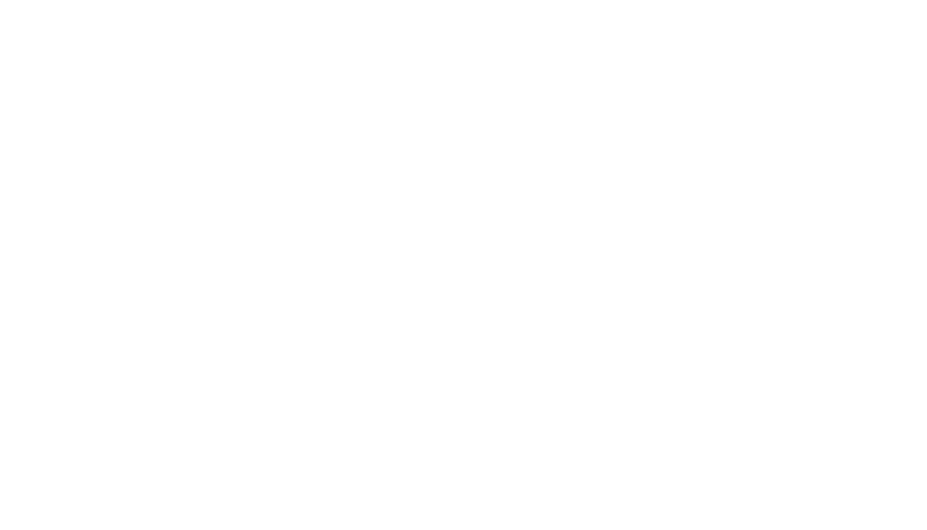

In [68]:
plt.plot(era5_t2m.index.values, era5_t2m.mean_2m_air_temperature.values)
plt.show()

In [6]:
era5_t2m.mean_2m_air_temperature.values.shape

(14852,)